# Logistic regression

The Pima are a group of Native Americans living in Arizona. 
A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. 
In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes and for this reason they have been subject of many studies.
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

## Dataset
 
 The dataset includes data from 768 women with 8 characteristics, in particular:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

## Source

 The original dataset is available at UCI Machine Learning Repository and can be downloaded from [this address](http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes).
 
 The link seems to not be active anymore.
 As of May 2020, this source worked: https://gist.github.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f

## The problem

 The type of dataset and problem is a classic supervised binary classification. 
 Given a number of elements all with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

 To solve the problem we will have to analyse the data, do any required transformation and normalisation, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.



In [117]:
#import libraries needed to read the data
import os
import pandas as pd
import numpy as np
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [118]:
# check you current word directoy
path = os.getcwd()
print(path)

# specify where the dataset is
DATASET_PATH = 'datasets/'

/home/jupyter-vasilerus


In [119]:
# add dataset file name to the directory name where the file is
data_path = os.path.join(DATASET_PATH, 'pima-indians-diabetes.csv')

# We read the data from the CSV file
dataset = pd.read_csv(data_path, header=None, names=col_names)

In [120]:
# Check the dataset: 777 lines of which 9 are a header/comments followed by 768 instances and of 9 values each.
# The dataset can be thought as a table with 768 rows and 9 columns.
# You can also think of the dataset as consisting of 768 instances of 9 values each.
# the first 8 values/columns are features/predictors
# the lat value is the class label (1 = has diabetes, 0 = no diabetes)
dataset.shape

(777, 9)

In [121]:
# better understand the data format
dataset.head(20)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,# 1. Number of times pregnant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# 2. Plasma glucose concentration a 2 hours in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,# 3. Diastolic blood pressure (mm Hg),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,# 4. Triceps skin fold thickness (mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,# 5. 2-Hour serum insulin (mu U/ml),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,# 6. Body mass index (weight in kg/(height in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,# 7. Diabetes pedigree function,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,# 8. Age (years),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,# 9. Class variable (0 or 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0


In [122]:
# drop the top 9 rows
dataset = dataset[9:]

In [123]:
# better understand the data format
dataset.head(20)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
9,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
10,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
11,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
12,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
13,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
14,5,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
15,3,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
16,10,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0
17,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
18,8,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1.0


In [124]:
# check how the various columns/predictors/features correlate with each other
corr = dataset.corr()
corr

,glucose,bp,skin,insulin,bmi,pedigree,age,label
glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


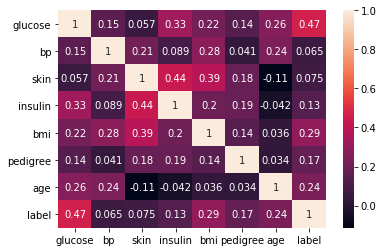

In [136]:
# generate a visualization of the correlation matrix above in the form of a heatmap
%matplotlib inline
import seaborn as sns
sns.heatmap(corr, annot = True)

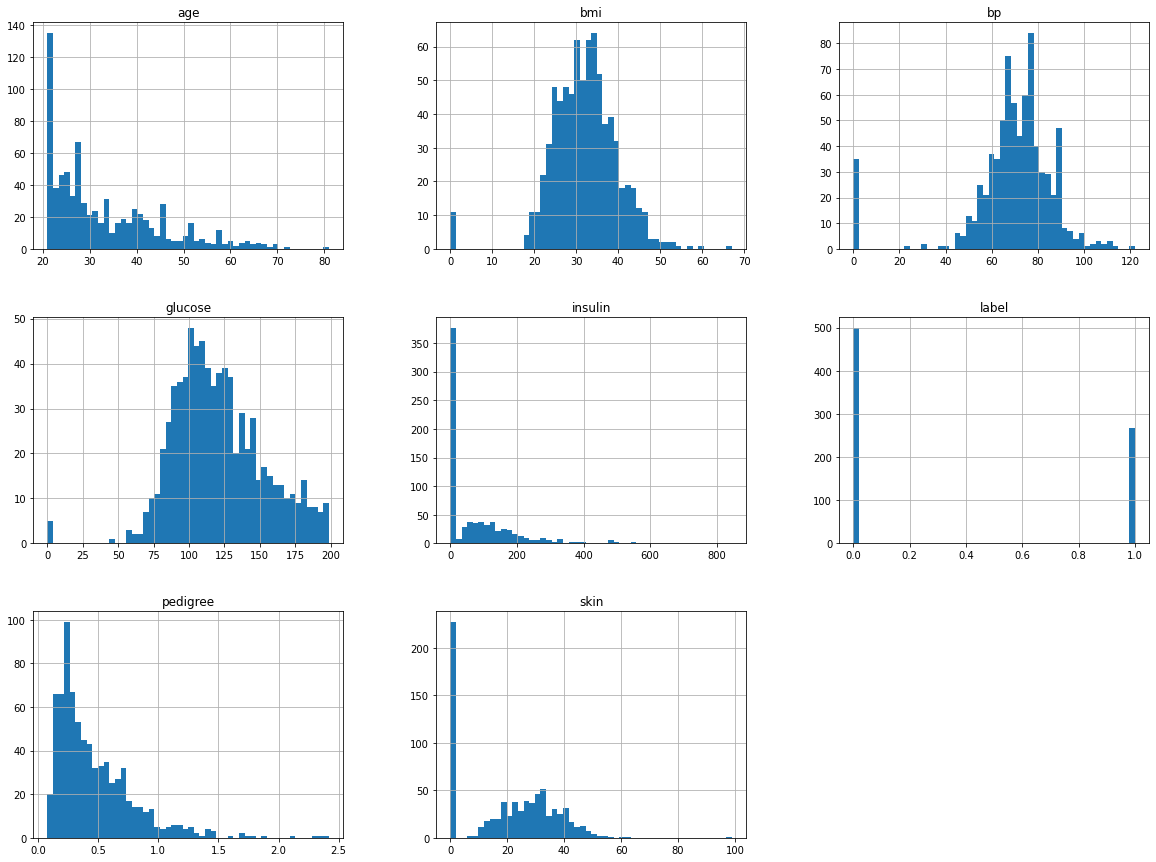

In [126]:
# inspect the data to understand it better: the distribution of values, any outliers, any missing values, etc.
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [127]:
# sanitize the data

# Calculate the median value for bmi
median_bmi = dataset['bmi'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
dataset['bmi'] = dataset['bmi'].replace(
    to_replace=0, value=median_bmi)

# Calculate the median value for bp
median_bp = dataset['bp'].median()
# Substitute it in the bp column of the
# dataset where values are 0
dataset['bp'] = dataset['bp'].replace(
    to_replace=0, value=median_bp)

# Calculate the median value for glucose
median_glucose = dataset['glucose'].median()
# Substitute it in the glucose column of the
# dataset where values are 0
dataset['glucose'] = dataset['glucose'].replace(
    to_replace=0, value=median_glucose)

# Calculate the median value for skin
median_skin = dataset['skin'].median()
# Substitute it in the skin column of the
# dataset where values are 0
dataset['skin'] = dataset['skin'].replace(
    to_replace=0, value=median_skin)

# Calculate the median value for insulin
median_insulin = dataset['insulin'].median()
# Substitute it in the insulin column of the
# dataset where values are 0
dataset['insulin'] = dataset['insulin'].replace(
    to_replace=0, value=median_insulin)

In [128]:
# Split the dataset into train/test subsests following a 80% - 20% split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    dataset, test_size=0.2, random_state=42)

In [129]:
# Separate labels from the rest of the dataset
train_set_labels = train_set["label"].copy()
train_set = train_set.drop("label", axis=1)

test_set_labels = test_set["label"].copy()
test_set = test_set.drop("label", axis=1)

In [130]:
# feature scaling is needed to bring all predictors into comparable value scales
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

# inspect scaled values
scaledTrainingDataset = pd.DataFrame(data=train_set_scaled)
scaledTrainingDataset.head()

,0,1,2,3,4,5,6,7
0,0.117647,0.258065,0.489796,0.272727,0.019832,0.282209,0.096499,0.000000
1,0.529412,0.438710,0.591837,0.290909,0.019832,0.204499,0.514091,0.483333
2,0.058824,0.612903,0.224490,0.200000,0.082933,0.214724,0.245944,0.016667
3,0.000000,0.754839,0.265306,0.272727,0.019832,0.075665,0.075149,0.733333
4,0.352941,0.580645,0.571429,0.527273,0.427885,0.572597,0.068318,0.416667


In [131]:
# Training a Logistic Regression model
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(train_set_scaled,train_set_labels)

#
test_set_predictedLabels = logreg.predict(test_set_scaled)

In [132]:
# inspect performance
# Performance can be assessed using the confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_set_predictedLabels, test_set_labels)
cnf_matrix

array([[85, 22],
       [14, 33]])

In [133]:
# Print accuracy, precision, and recall
print("Accuracy:",metrics.accuracy_score(test_set_labels, test_set_predictedLabels))
print("Precision:",metrics.precision_score(test_set_labels, test_set_predictedLabels))
print("Recall:",metrics.recall_score(test_set_labels, test_set_predictedLabels))

Accuracy: 0.7662337662337663
Precision: 0.7021276595744681
Recall: 0.6


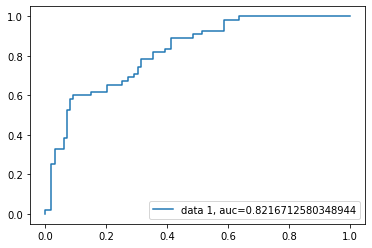

In [134]:
# generate the ROC curve
test_predicted_proba = logreg.predict_proba(test_set_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_set_labels,  test_predicted_proba)
auc = metrics.roc_auc_score(test_set_labels, test_predicted_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [135]:
# make a prediction oa new instance

# We create a new instance for, say, a particular new patient
new_instance = pd.DataFrame([[6, 168, 72, 35, 0, 43.6, 0.627, 65]])
# We scale those values like the others
new_instance_scaled = scaler.transform(new_instance)
# We predict the outcome
prediction = logreg.predict(new_instance_scaled)
# A value of "1" means that this person is likley to have type 2 diabetes
prediction

array([1.])